In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 12)
pd.set_option('display.expand_frame_repr', False)
%matplotlib widget

In [3]:
maxLoc = 511

def loadAndPlot(name, plotRho=True, plotPressure=True, plotVx=True, plotVy=True, plotVz=True, plotBx=True, plotBy=True, plotBz=True):
    # Load Data
    fileName = 'athena++-results/' + name
    rawData  = np.loadtxt(fileName, skiprows=2)
    
    cellNumber      = rawData[:,0].astype('int')
    rho             = rawData[:,2]
    press           = rawData[:,3]
    Vx              = rawData[:,4]
    Vy              = rawData[:,5]
    Vz              = rawData[:,6]
    BxCellCentered  = rawData[:,7]
    ByCellCentered  = rawData[:,8]
    BzCellCentered  = rawData[:,9]

    BxFaceCentered  = np.zeros(BxCellCentered.size)
    ByFaceCentered  = np.zeros(BxCellCentered.size)
    BzFaceCentered  = np.zeros(BxCellCentered.size)

    for i in range(BxCellCentered.size-1):
        BxFaceCentered[i] = 0.5 * (BxCellCentered[i] + BxCellCentered[i+1])
        ByFaceCentered[i] = 0.5 * (ByCellCentered[i] + ByCellCentered[i+1])
        BzFaceCentered[i] = 0.5 * (BzCellCentered[i] + BzCellCentered[i+1])
        
    # Plotting
    plotFig = plt.figure(name)
    plotFig.clear()
    plt.plot(cellNumber[:-1], rho[:-1],            linestyle='-', color='tab:green',  label='Density')  if plotRho      else None
    plt.plot(cellNumber[:-1], press[:-1],          linestyle='-', color='tab:pink',   label='Pressure') if plotPressure else None
    plt.plot(cellNumber[:-1], Vx[:-1],             linestyle='-', color='tab:olive',  label='Vx')       if plotVx       else None
    plt.plot(cellNumber[:-1], Vy[:-1],             linestyle='-', color='tab:red',    label='Vy')       if plotVy       else None
    plt.plot(cellNumber[:-1], Vz[:-1],             linestyle='-', color='tab:orange', label='Vz')       if plotVz       else None
    plt.plot(cellNumber[:-1], BxFaceCentered[:-1], linestyle='-', color='tab:blue',   label='Bx')       if plotBx       else None
    plt.plot(cellNumber[:-1], ByFaceCentered[:-1], linestyle='-', color='tab:purple', label='By')       if plotBy       else None
    plt.plot(cellNumber[:-1], BzFaceCentered[:-1], linestyle='-', color='tab:cyan',   label='Bz')       if plotBz       else None
    
    plt.xlabel('Cell Number')
    plt.ylabel('Value')
    
    plt.grid()
    plt.legend()
    plt.show()
    
    frame = pd.DataFrame({'cellNumber':cellNumber,
                          'Density':rho,
                          'Pressure':press,
                          'Vx':Vx,
                          'Vy':Vy,
                          'Vz':Vz,
                          'Bx':BxFaceCentered,
                          'By':ByFaceCentered,
                          'Bz':BzFaceCentered})
    frame.set_index('cellNumber')
    return frame
    
    
def printData(nameLocationList, data):
    '''
    This function prints out pretty results for all the locations given. Each
    element in the list is a pair, the first is the location and the second
    element is the name of that location. Note that this function doesn't sort
    them and so if you want them sorted then you must sort them yourself
    '''
    
    prettyTable = pd.DataFrame(columns = ['cellNumber', 'Density', 'Pressure', 'Vx', 'Vy', 'Vz', 'Bx', 'By', 'Bz'])
    for pair in nameLocationList:
        prettyTable.loc[pair[1]] = [pair[0],
                                    data.loc[(pair[0],'Density')],
                                    data.loc[(pair[0],'Pressure')],
                                    data.loc[(pair[0],'Vx')],
                                    data.loc[(pair[0],'Vy')],
                                    data.loc[(pair[0],'Vz')],
                                    data.loc[(pair[0],'Bx')],
                                    data.loc[(pair[0],'By')],
                                    data.loc[(pair[0],'Bz')]]
    # End loop
    # Print results
    print(prettyTable)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
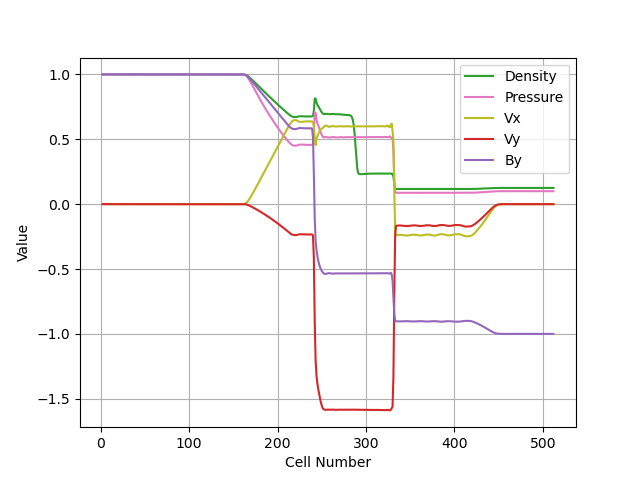

                        cellNumber   Density  Pressure        Vx        Vy   Vz    Bx        By   Bz
leftFastRareLeftSide         166.0  0.978576  0.957621  0.038603 -0.011074  0.0  0.75  0.970288  0.0
leftFastRareRightSide        217.0  0.671655  0.451115  0.647082 -0.238291  0.0  0.75  0.578240  0.0
compoundLeftSide             240.0  0.814306  0.706578  0.506792 -0.911794  0.0  0.75 -0.108819  0.0
compoundPeak                 243.0  0.765841  0.624742  0.523701 -1.383720  0.0  0.75 -0.400787  0.0
compoundRightSide            251.0  0.695211  0.515237  0.601089 -1.583720  0.0  0.75 -0.537027  0.0
contactLeftSide              281.0  0.680453  0.515856  0.598922 -1.584490  0.0  0.75 -0.533616  0.0
contactRightSide             292.0  0.231160  0.516212  0.599261 -1.584820  0.0  0.75 -0.533327  0.0
slowShockLeftSide            330.0  0.153125  0.191168  0.086170 -0.683303  0.0  0.75 -0.850815  0.0
slowShockRightSide           333.0  0.117046  0.087684 -0.238196 -0.165561  0.0  0.75 -0.90

In [3]:
# Brio & Wu Shock Tube
bwData = loadAndPlot('Brio-Wu-out.tab', plotVz=False, plotBz=False, plotBx=False)

# | Waves, left to right  | Location, Left Side | Location, Right Side |
# |-----------------------|---------------------|----------------------|
# | Fast rarefaction      | 166                 | 217                  |
# | Compound wave         | 240                 | 251                  |
# | Compound wave Peak    | 243                 | n/a                  |
# | Contact discontinuity | 281                 | 292                  |
# | Slow shock            | 330                 | 333                  |
# | Fast rarefaction      | 420                 | 448                  |

printData([(166, 'leftFastRareLeftSide'),
           (217, 'leftFastRareRightSide'),
           (240, 'compoundLeftSide'),
           (243, 'compoundPeak'),
           (251, 'compoundRightSide'),
           (281, 'contactLeftSide'),
           (292, 'contactRightSide'),
           (330, 'slowShockLeftSide'),
           (333, 'slowShockRightSide'),
           (420, 'rightFastRareLeftSide'),
           (448, 'rightFastRareRightSide')],
          bwData)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
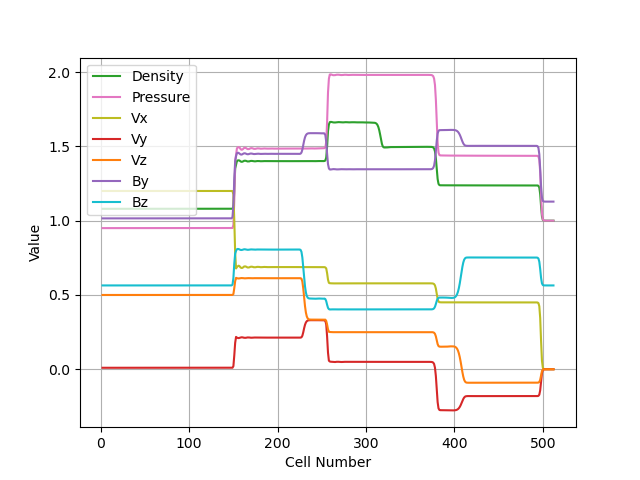

                         cellNumber  Density  Pressure        Vx        Vy        Vz       Bx        By        Bz
leftFastShockLeftSide         148.0  1.09406  0.970815  1.176560  0.021003  0.506113  1.12838  1.105355  0.614087
leftFastShockRightSide        153.0  1.40577  1.494290  0.693255  0.210562  0.611423  1.12838  1.457700  0.809831
leftRotationLeftSide          225.0  1.40086  1.485660  0.687774  0.215124  0.609161  1.12838  1.458735  0.789960
leftRotationRightSide         236.0  1.40119  1.486570  0.687504  0.330268  0.334140  1.12838  1.588975  0.475782
leftSlowShockLeftSide         252.0  1.40519  1.493710  0.685492  0.326265  0.333664  1.12838  1.575785  0.472390
leftSlowShockRightSide        258.0  1.66488  1.984720  0.578545  0.050746  0.250260  1.12838  1.344490  0.402407
contactLeftSide               310.0  1.65220  1.981250  0.578296  0.049683  0.249962  1.12838  1.346155  0.402868
contactRightSide              320.0  1.49279  1.981160  0.578276  0.049650  0.249924  1.

In [3]:
dwData = loadAndPlot('Dai-Woodward-out.tab', plotBx=False)

# | Waves, left to right  | Location, Left Side | Location, Right Side |
# |-----------------------|---------------------|----------------------|
# | Fast Shock            | 148                 | 153                  |
# | Rotation Wave         | 225                 | 236                  |
# | Slow Shock            | 252                 | 258                  |
# | Contact Discontinuity | 310                 | 320                  |
# | Slow Shock            | 375                 | 383                  |
# | Rotation Wave         | 400                 | 412                  |
# | Fast Shock            | 494                 | 500                  |

printData([(148, 'leftFastShockLeftSide'),
           (153, 'leftFastShockRightSide'),
           (225, 'leftRotationLeftSide'),
           (236, 'leftRotationRightSide'),
           (252, 'leftSlowShockLeftSide'),
           (258, 'leftSlowShockRightSide'),
           (310, 'contactLeftSide'),
           (320, 'contactRightSide'),
           (375, 'rightSlowShockLeftSide'),
           (383, 'rightSlowShockRightSide'),
           (400, 'rightRotationLeftSide'),
           (412, 'rightRotationRightSide'),
           (494, 'rightFastShockLeftSide'),
           (500, 'rightFastShockRightSide')], 
          dwData)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
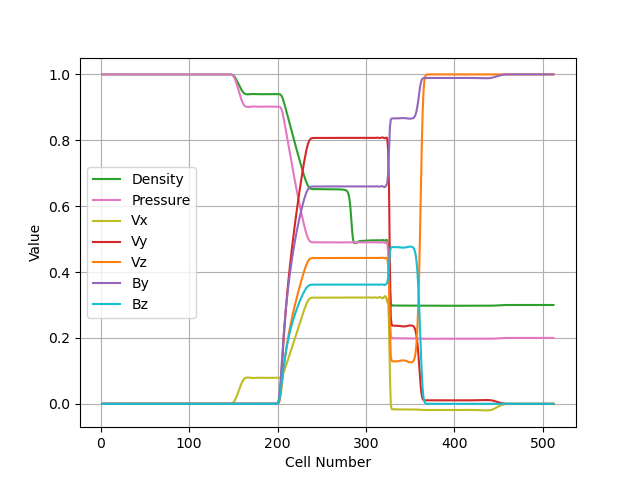

                            cellNumber   Density  Pressure        Vx            Vy            Vz   Bx            By            Bz
hydroRareLeftSide                150.0  0.990414  0.984076  0.012415  1.458910e-58  6.294360e-59  0.7  1.252355e-57  5.366795e-58
hydroRareRightSide               165.0  0.939477  0.901182  0.079800  1.557120e-41  7.505190e-42  0.7  1.823624e-40  8.712177e-41
switchOnSlowShockLeftSide        200.0  0.939863  0.901820  0.079142  1.415730e-02  7.134030e-03  0.7  2.519650e-02  1.290082e-02
switchOnSlowShockRightSide       240.0  0.651753  0.490103  0.322362  8.070540e-01  4.425110e-01  0.7  6.598380e-01  3.618000e-01
contactLeftSide                  275.0  0.648553  0.489951  0.322525  8.072970e-01  4.426950e-01  0.7  6.599295e-01  3.618910e-01
contactRightSide                 288.0  0.489933  0.489980  0.322518  8.073090e-01  4.426960e-01  0.7  6.599195e-01  3.618850e-01
slowShockLeftSide                322.0  0.496478  0.489823  0.308418  8.060830e-01  4.4201

In [7]:
rjData = loadAndPlot('Ryu-Jones-out.tab', plotBx=False)


# | Waves, left to right  | Location, Left Side | Location, Right Side |
# |-----------------------|---------------------|----------------------|
# | Hydro Rarefaction     | 150                 | 165                  |
# | Switch On Slow Shock  | 200                 | 240                  |
# | Contact Discontinuity | 275                 | 288                  |
# | Slow Shock            | 322                 | 329                  |
# | Rotation Wave         | 351                 | 367                  |
# | Fast Rarefaction      | 435                 | 460                  |

printData([(150, 'hydroRareLeftSide'),
           (165, 'hydroRareRightSide'),
           (200, 'switchOnSlowShockLeftSide'),
           (240, 'switchOnSlowShockRightSide'),
           (275, 'contactLeftSide'),
           (288, 'contactRightSide'),
           (322, 'slowShockLeftSide'),
           (329, 'slowShockRightSide'),
           (351, 'rotationLeftSide'),
           (367, 'rotationRightSide'),
           (435, 'fastRareLeftSide'),
           (460, 'fastRareRightSide')], 
          rjData)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
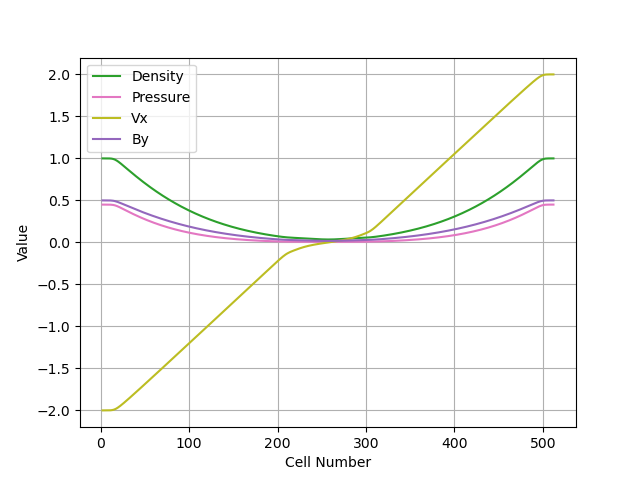

                        cellNumber   Density  Pressure        Vx   Vy   Vz   Bx        By   Bz
leftRarefactionCenter        100.0  0.368580  0.111253 -1.180830  0.0  0.0  0.0  0.183044  0.0
leftVxTurnOver               210.0  0.058814  0.008819 -0.125475  0.0  0.0  0.0  0.029215  0.0
midPoint                     256.0  0.034658  0.006776  0.000778  0.0  0.0  0.0  0.017333  0.0
rightVxTurnOver              305.0  0.062587  0.009521  0.152160  0.0  0.0  0.0  0.031576  0.0
rightRarefactionCenter       400.0  0.316485  0.089875  1.073560  0.0  0.0  0.0  0.159366  0.0


In [5]:
efrData = loadAndPlot('efr-out.tab', plotVy=False, plotVz=False, plotBx=False, plotBz=False)

# | Waves, left to right     | Location |
# |--------------------------|----------|
# | Left Rarefaction Center  | 100      |
# | Left Vx Turn Over        | 210      |
# | Mid Point                | 256      |
# | Right Vx Turn Over       | 305      |
# | Right Rarefaction Center | 400      |

printData([(100, 'leftRarefactionCenter'),
           (210, 'leftVxTurnOver'),
           (256, 'midPoint'),
           (305, 'rightVxTurnOver'),
           (400, 'rightRarefactionCenter')],
          efrData)